# Assignment 2 - Deep Learning - Customer Churn - Narendra Nagtode

## Import required libraries

In [51]:
# Check the current directory
!cd

C:\Users\nnagt\DataScienceWithNaren


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import InputLayer 
from keras.layers import Dropout
from keras.constraints import maxnorm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from IPython.core.display import HTML

import mlflow
import mlflow.keras

In [53]:
df = pd.read_csv("customer-churn-dataset.csv")

In [54]:
df.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True


In [55]:
df.isna().head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Check for missing values

In [56]:
missing_columns = df.columns[df.isnull().any()]

In [57]:
missing_columns_list = missing_columns.tolist()

In [58]:
print("List of columns with missing values: ", missing_columns_list)

List of columns with missing values:  []


In [59]:
df.Churn.replace(["true", "false"], [1, 0], inplace= True)
df["Area code"] = df["Area code"].astype(object)

C:\Users\nnagt\AppData\Local\Temp\ipykernel_12476\1982670828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Churn.replace(["true", "false"], [1, 0], inplace= True)


## One hot encoding / dummies

In [60]:
df = pd.get_dummies(df)

In [61]:
datatypes = df.dtypes
datatypes

Account length              int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
                           ...   
Area code_510                bool
International plan_No        bool
International plan_Yes       bool
Voice mail plan_No           bool
Voice mail plan_Yes          bool
Length: 74, dtype: object

In [62]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [63]:
display(HTML(df.head(2).to_html()))

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_408,Area code_415,Area code_510,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,117,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False
1,65,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False


In [64]:
X.head(2)

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,State_WI,State_WV,State_WY,Area code_408,Area code_415,Area code_510,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,117,0,184.5,97,31.37,351.6,80,29.89,215.8,90,...,False,False,False,True,False,False,True,False,True,False
1,65,0,129.1,137,21.95,228.5,83,19.42,208.8,111,...,False,False,False,False,True,False,True,False,True,False


## Compute correlations between all variables and 'Churn'

In [65]:
y.head(2)

0    False
1     True
Name: Churn, dtype: bool

In [66]:
correlations = df.corr()["Churn"].drop("Churn").sort_values()

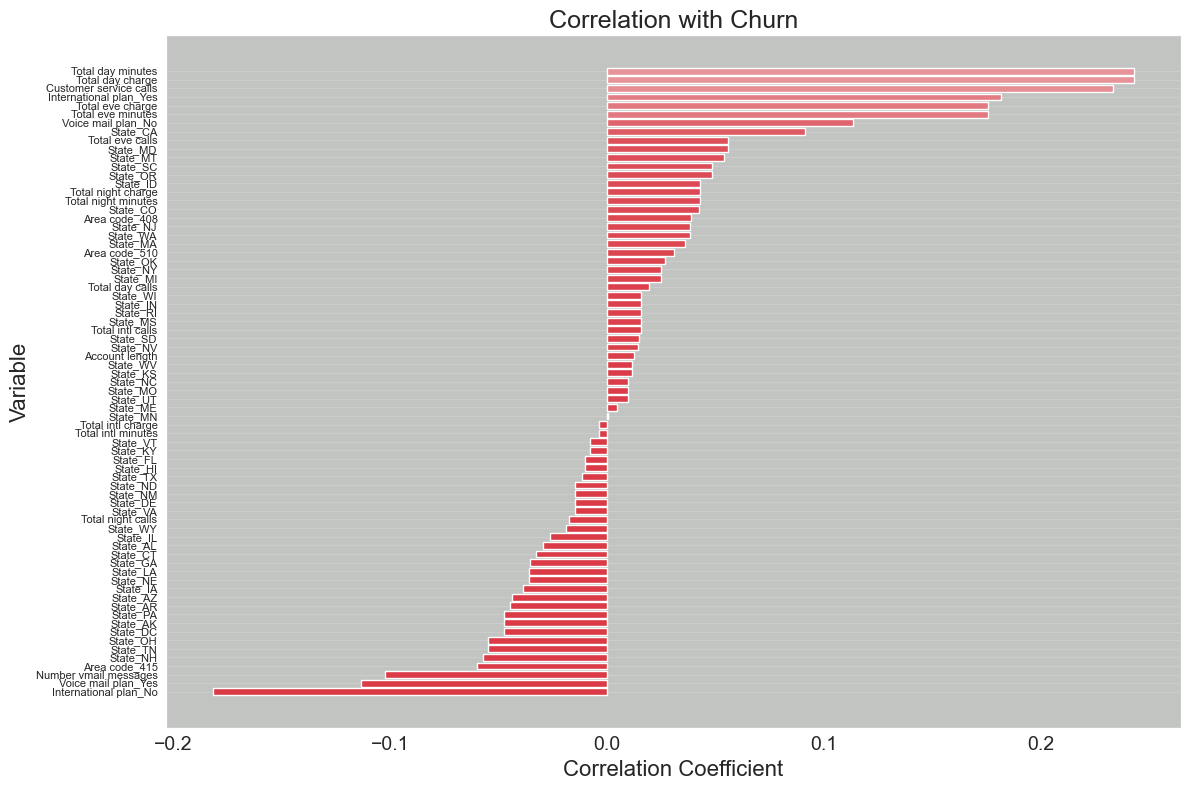

In [78]:
# Generate a color palette from red to green
colors = sns.diverging_palette(10, 130, as_cmap=True)
color_mapped = correlations.map(colors)

# Set Seaborn style
sns.set_style(
    "whitegrid", {"axes.facecolor": "#c2c4c2", "grid.linewidth": 1.5}
)  # Light grey background and thicker grid lines

# Create bar plot
fig = plt.figure(figsize=(12, 8))
plt.barh(correlations.index, correlations.values, color=color_mapped)

# Set labels and title with increased font size
plt.title("Correlation with Churn", fontsize=18)
plt.xlabel("Correlation Coefficient", fontsize=16)
plt.ylabel("Variable", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=8)
plt.grid(axis="x")

plt.tight_layout()


In [79]:
datatypes = df.dtypes
datatypes

Account length              int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
                           ...   
Area code_510                bool
International plan_No        bool
International plan_Yes       bool
Voice mail plan_No           bool
Voice mail plan_Yes          bool
Length: 74, dtype: object

## Split the data into train and test data sets

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=123)
X_train.shape

(533, 73)

In [70]:
# Convert X_train and X_test to float32
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

# Convert y_train and y_test to float32 or int64
y_train = np.array(y_train, dtype=np.float32)  # or dtype=np.int64 for classification
y_test = np.array(y_test, dtype=np.float32)  # or dtype=np.int64 for classification

In [71]:
# set the experiment id
mlflow.set_experiment(experiment_id="0")

mlflow.autolog()


2024/07/21 06:36:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/07/21 06:36:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/07/21 06:36:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


## Setup a keras sequencial Neural Network model

In [72]:
with mlflow.start_run() as run:
    nn_model = Sequential()
    nn_model.add(Dense(16, input_dim=73, activation='relu', kernel_constraint=maxnorm(3)))
    
    # Add a dropout layer to avoid overfitting
    nn_model.add(Dropout(rate=0.2))
    
    nn_model.add(Dense(8, activation='relu', kernel_constraint=maxnorm(3)))
    
    # Add a dropout layer to avoid overfitting
    nn_model.add(Dropout(rate=0.2))
    
    nn_model.add(Dense(1, activation='sigmoid'))
    
    nn_model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])
    
    # Log parameters
    mlflow.log_param("input_dim", 73)
    mlflow.log_param("epochs", 71)
    mlflow.log_param("batch_size", 20)
    mlflow.log_param("dropout_rate", 0.2)
    
    history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=71, batch_size=20)

    # Log the model
    mlflow.keras.log_model(nn_model, "model")

    # Log metrics
    for epoch in range(len(history.history['loss'])):
        mlflow.log_metric("train_loss", history.history['loss'][epoch], step=epoch)
        mlflow.log_metric("val_loss", history.history['val_loss'][epoch], step=epoch)
        mlflow.log_metric("train_accuracy", history.history['accuracy'][epoch], step=epoch)
        mlflow.log_metric("val_accuracy", history.history['val_accuracy'][epoch], step=epoch)


Epoch 1/71
27/27 [==============================] - 3s 25ms/step - loss: 11.0677 - accuracy: 0.4991 - val_loss: 2.0153 - val_accuracy: 0.8060
Epoch 2/71
27/27 [==============================] - 0s 8ms/step - loss: 4.0596 - accuracy: 0.7523 - val_loss: 1.8393 - val_accuracy: 0.8284
Epoch 3/71
27/27 [==============================] - 0s 10ms/step - loss: 2.6587 - accuracy: 0.7523 - val_loss: 1.2615 - val_accuracy: 0.7090
Epoch 4/71
27/27 [==============================] - 0s 9ms/step - loss: 2.0558 - accuracy: 0.7955 - val_loss: 0.7790 - val_accuracy: 0.7985
Epoch 5/71
27/27 [==============================] - 0s 11ms/step - loss: 1.3732 - accuracy: 0.8068 - val_loss: 0.6904 - val_accuracy: 0.8209
Epoch 6/71
27/27 [==============================] - 0s 11ms/step - loss: 1.1310 - accuracy: 0.8330 - val_loss: 0.6686 - val_accuracy: 0.8358
Epoch 7/71
27/27 [==============================] - 0s 11ms/step - loss: 1.0438 - accuracy: 0.8368 - val_loss: 0.6567 - val_accuracy: 0.8433
Epoch 8/71
27/

2024/07/21 06:37:21 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\nnagt\AppData\Local\Temp\tmpvlnyhos7\model\data\model\assets


In [73]:
history

## Plot the history

In [74]:
# Plotting the history
def plot_history(history):
    # Summarize history for accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()


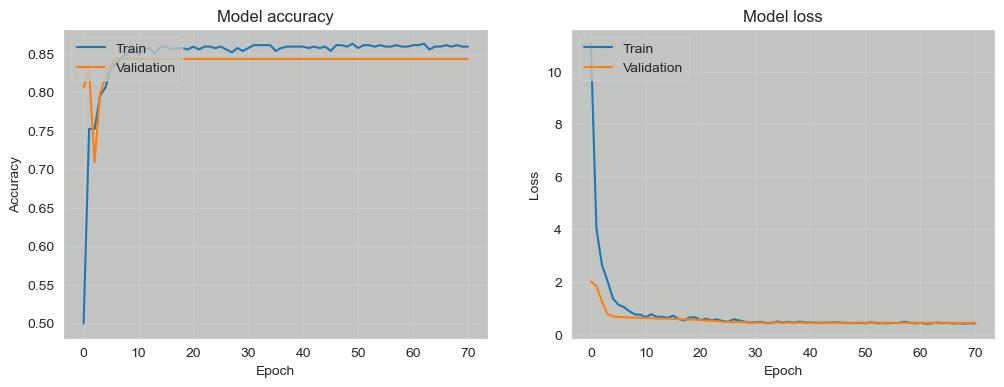

In [75]:
# Call the function to plot the history
plot_history(history)